# Classification based of musk vs non musk with transfer learning

Here our approach is to first train our model with 102 class of molecule and then add another layer on the top of the previously trained model and again train it with binary class of musk vs non mask with dense layer with 1 perceptron in final layer

## Training multiclass molecule classification model

Dataset is uploaded to a github repo URL is saved here

In [0]:
URL = "https://raw.githubusercontent.com/rani700/datasets/master/musk_csv.csv"

### Importing libraries for data manipulation and visualisation

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading dataset into DataFrame

In [0]:
df = pd.read_csv(URL)

In [145]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


### Seperating Features (Input) and Output (Labels) for training
here I have taken molecule_name as output / labels

In [0]:
X = df.iloc[:, 3:-1].values

In [147]:
X.shape

(6598, 166)

In [0]:
y = df.iloc[:, 1].values

In [149]:
np.unique(y).shape

(102,)

### One Hot Encoding the labels for training

In [0]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

### Scaling the data using StandardScaler

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

### Spliting the dataset into training and testing set (Ratio 80:20)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### Importing Sequential model and Dense Layer from keras

In [0]:
from keras import Sequential
from keras.layers import Dense

### Making model for training

In [0]:
model = Sequential()
model.add(Dense(300, activation='softmax'))
model.add(Dense(200, activation='relu'))
model.add(Dense(102, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Training on train set generated above and using test set as validation data over 20 epochs

In [155]:
model.fit(X_train, y_train, verbose=1, validation_data=(X_test, y_test), epochs=100)

Train on 5278 samples, validate on 1320 samples
Epoch 1/100
5278/5278 [==============================] - 1s 205us/step - loss: 0.0721 - acc: 0.0885 - val_loss: 0.0090 - val_acc: 0.1765
Epoch 2/100
5278/5278 [==============================] - 1s 104us/step - loss: 0.0086 - acc: 0.2154 - val_loss: 0.0081 - val_acc: 0.2727
Epoch 3/100
5278/5278 [==============================] - 1s 107us/step - loss: 0.0078 - acc: 0.3175 - val_loss: 0.0073 - val_acc: 0.3985
Epoch 4/100
5278/5278 [==============================] - 1s 116us/step - loss: 0.0069 - acc: 0.4360 - val_loss: 0.0063 - val_acc: 0.4485
Epoch 5/100
5278/5278 [==============================] - 1s 127us/step - loss: 0.0059 - acc: 0.5746 - val_loss: 0.0051 - val_acc: 0.6826
Epoch 6/100
5278/5278 [==============================] - 1s 114us/step - loss: 0.0046 - acc: 0.6787 - val_loss: 0.0040 - val_acc: 0.6992
Epoch 7/100
5278/5278 [==============================] - 1s 128us/step - loss: 0.0040 - acc: 0.6800 - val_loss: 0.0036 - val_acc: 

### Plotting Training vs Validation Accuracy and Loss

In [0]:
train_accuracy = model.history.history['acc']
validation_accuracy = model.history.history['val_acc']

train_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']

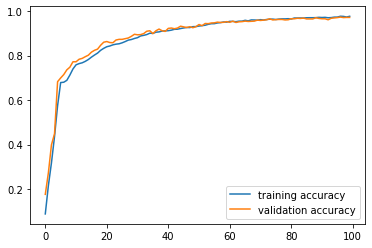

In [157]:
plt.plot(train_accuracy, label='training accuracy')
plt.plot(validation_accuracy, label='validation accuracy')
plt.legend()
plt.show()

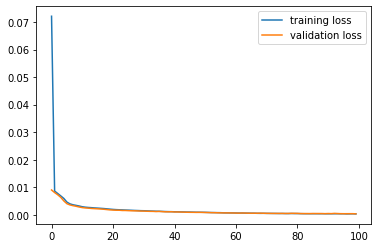

In [158]:
plt.plot(train_loss, label='training loss')
plt.plot(validation_loss, label='validation loss')
plt.legend()
plt.show()

In [0]:
model.save('model_molecule_dnn.h5')

### Generating Classification Report and Confusion matrix

In [0]:
y_hat = model.predict(X_test)

In [0]:
y_hat_i = []
y_test_i = []
for i in range(len(y_test)):
  y_hat_i.append(np.argmax(y_hat[i]))
  y_test_i.append(np.argmax(y_test[i]))


In [0]:
y_hat_i = np.array(y_hat_i)
y_test_i = np.array(y_test_i)

In [163]:
print("Accuracy = ")
sum((y_hat_i == y_test_i).astype(int))/len(y_test_i)

Accuracy = 


0.9712121212121212

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_i, y_hat_i))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00         7
          12       0.20      0.33      0.25         3
          13       1.00      1.00      1.00         2
          14       0.79      1.00      0.88        11
          15       0.00      0.00      0.00         3
          18       1.00      0.67      0.80         3
          20       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
confusion_matrix(y_test_i, y_hat_i)

array([[ 2,  0,  0, ...,  0,  0,  0],
       [ 0,  3,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

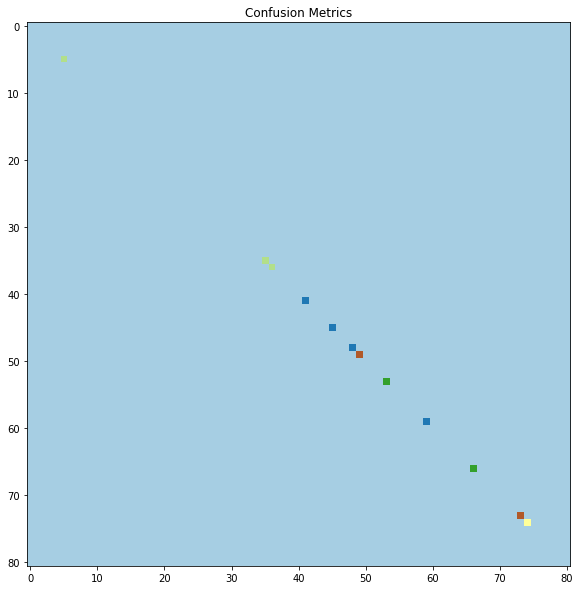

In [166]:
plt.figure(figsize=(10, 10))
plt.title("Confusion Metrics")
plt.imshow(confusion_matrix(y_test_i, y_hat_i), cmap='Paired', interpolation='nearest')
plt.show()

In [167]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               50100     
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_17 (Dense)             (None, 102)               20502     
Total params: 130,802
Trainable params: 130,802
Non-trainable params: 0
_________________________________________________________________


## Using Transfer learning on the previously trained model

In [0]:
# Cerating the new output for musk vs non musk calssification 
y1 = df.iloc[:, -1].values

### Copying the model

In [0]:
model1 = model

In [175]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               50100     
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_17 (Dense)             (None, 102)               20502     
Total params: 130,802
Trainable params: 130,802
Non-trainable params: 0
_________________________________________________________________


### Adding the dense layer to the model and compiling it again

In [0]:
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [177]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               50100     
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_17 (Dense)             (None, 102)               20502     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5150      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 136,003
Trainable params: 136,003
Non-trainable params: 0
_________________________________________________________________


### Preparing the dataset for new binary classification

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, train_size=0.8, test_size=0.2)

### Training the transfer learning model for 5 epoch

In [179]:
model1.fit(X_train1, y_train1, verbose=1, validation_data=(X_test1, y_test1), epochs=20)

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
5278/5278 [==============================] - 1s 256us/step - loss: 0.1051 - acc: 0.8899 - val_loss: 0.0385 - val_acc: 0.9682
Epoch 2/20
5278/5278 [==============================] - 1s 121us/step - loss: 0.0225 - acc: 0.9786 - val_loss: 0.0129 - val_acc: 0.9841
Epoch 3/20
5278/5278 [==============================] - 1s 122us/step - loss: 0.0118 - acc: 0.9862 - val_loss: 0.0100 - val_acc: 0.9894
Epoch 4/20
5278/5278 [==============================] - 1s 126us/step - loss: 0.0048 - acc: 0.9964 - val_loss: 0.0069 - val_acc: 0.9939
Epoch 5/20
5278/5278 [==============================] - 1s 121us/step - loss: 0.0039 - acc: 0.9953 - val_loss: 0.0035 - val_acc: 0.9970
Epoch 6/20
5278/5278 [==============================] - 1s 127us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0037 - val_acc: 0.9955
Epoch 7/20
5278/5278 [==============================] - 1s 129us/step - loss: 0.0026 - acc: 0.9972 - val_loss: 0.0030 - val_acc: 0.9962


### Checking the preformance of the newly created model

In [0]:
train_accuracy = model1.history.history['acc']
validation_accuracy = model1.history.history['val_acc']

train_loss = model1.history.history['loss']
validation_loss = model1.history.history['val_loss']

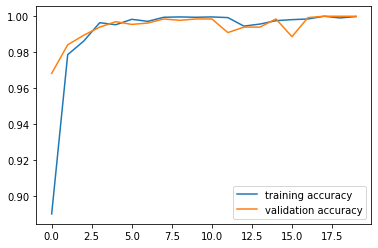

In [181]:
plt.plot(train_accuracy, label='training accuracy')
plt.plot(validation_accuracy, label='validation accuracy')
plt.legend()
plt.show()

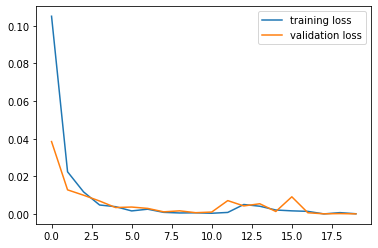

In [182]:
plt.plot(train_loss, label='training loss')
plt.plot(validation_loss, label='validation loss')
plt.legend()
plt.show()

In [0]:
y_hat = model1.predict(X_test1)

In [0]:
y_hat = (y_hat[:] > 0.5).astype(int).flatten()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [186]:
print(classification_report(y_test1, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1110
           1       1.00      1.00      1.00       210

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [0]:
model1.save('model_musk_vs_non_musk_transfer_learning.h5')

In [194]:
print("Accuracy = ")
sum((y_hat == y_test1).astype(int))/len(y_hat)

Accuracy = 


1.0

In [189]:
confusion_matrix(y_test1,y_hat)

array([[1110,    0],
       [   0,  210]])

### Finally achieved 100% accuracy